In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [19]:
df_train.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [20]:
df_train['loan_paid_back'].value_counts()

loan_paid_back
1.0    474494
0.0    119500
Name: count, dtype: int64

In [21]:
df_train.isna().sum()

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

In [22]:
df_train = df_train.drop(['id'], axis=1)

In [23]:
df_train.shape

(593994, 12)

In [24]:
categorical = ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']
for cat in categorical:
    print(df_train[cat].unique())

['Female' 'Male' 'Other']
['Single' 'Married' 'Divorced' 'Widowed']
['High School' "Master's" "Bachelor's" 'PhD' 'Other']
['Self-employed' 'Employed' 'Unemployed' 'Retired' 'Student']
['Other' 'Debt consolidation' 'Home' 'Education' 'Vacation' 'Car'
 'Medical' 'Business']
['C3' 'D3' 'C5' 'F1' 'D1' 'D5' 'C2' 'C1' 'F5' 'D4' 'C4' 'D2' 'E5' 'B1'
 'B2' 'F4' 'A4' 'E1' 'F2' 'B4' 'E4' 'B3' 'E3' 'B5' 'E2' 'F3' 'A5' 'A3'
 'A1' 'A2']


In [25]:
numerical_columns = df_train.select_dtypes(include='number').columns
print(df_train.shape)
for column in numerical_columns.drop(['loan_paid_back']):
    iqr = df_train[column].quantile(0.75) - df_train[column].quantile(0.25)
    lower_bound = df_train[column].quantile(0.25) - 1.5 * iqr
    upper_bound = df_train[column].quantile(0.75) + 1.5 * iqr
    df_train = df_train[(df_train[column] > lower_bound) | (df_train[column] < upper_bound)]
print(df_train.shape)

(593994, 12)
(593994, 12)


In [26]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def encoding(df, column):

    encoder = OneHotEncoder(sparse_output=False)
    df = pd.concat([
        df.drop(column, axis=1),
        pd.DataFrame(encoder.fit_transform(df[[column]]), columns=encoder.get_feature_names_out())
    ], axis=1)
    return df

In [27]:
df_train = encoding(df_train, 'gender')

df_train = encoding(df_train, 'marital_status')

df_train = encoding(df_train, 'education_level')

df_train = encoding(df_train, 'employment_status')

df_train = encoding(df_train, 'loan_purpose')

In [28]:
df_train

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,grade_subgrade,loan_paid_back,gender_Female,gender_Male,gender_Other,...,employment_status_Student,employment_status_Unemployed,loan_purpose_Business,loan_purpose_Car,loan_purpose_Debt consolidation,loan_purpose_Education,loan_purpose_Home,loan_purpose_Medical,loan_purpose_Other,loan_purpose_Vacation
0,29367.99,0.084,736,2528.42,13.67,C3,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,22108.02,0.166,636,4593.10,12.92,D3,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,49566.20,0.097,694,17005.15,9.76,C5,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,46858.25,0.065,533,4682.48,16.10,F1,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,25496.70,0.053,665,12184.43,10.21,D1,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593989,23004.26,0.152,703,20958.37,10.92,C3,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
593990,35289.43,0.105,559,3257.24,14.62,F5,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
593991,47112.64,0.072,675,929.27,14.13,C1,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
593992,76748.44,0.067,740,16290.40,9.87,B2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df_train = pd.concat([
    df_train.drop('grade_subgrade', axis=1),
    df_train['grade_subgrade'].apply(lambda x: [x[0], x[1]]).apply(pd.Series)
], axis=1)

In [30]:
df_train.columns = df_train.columns.astype(str)
df_train = df_train.rename({'0': 'grade', '1': 'subgrade'})

In [31]:
df_train = encoding(df_train, '0')

In [32]:
df_train['1'] = df_train['1'].astype(int)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_train.drop(['loan_paid_back'], axis=1), df_train['loan_paid_back']

In [34]:
scaler = StandardScaler()
X[numerical_columns.drop('loan_paid_back')] = scaler.fit_transform(X[numerical_columns.drop('loan_paid_back')])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# params = {
#     'n_estimators': [50, 100, 150],
#     'criterion': ['gini', 'log_loss'],
#     'min_samples_split': [2, 4, 8],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid = GridSearchCV(model, params, verbose=1)
# #model.fit(X_train, y_train)
# grid.fit(X_train, y_train)

params = {'criterion': 'log_loss',
            'min_samples_leaf': 1,
            'min_samples_split': 2,
            'n_estimators': 150}

model = RandomForestClassifier(**params, class_weight='balanced', n_jobs=-1)

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model.fit(X_train, y_train)
preds = model.predict(X_test)
print(
    accuracy_score(y_test, preds),
    classification_report(y_test, preds),
    confusion_matrix(y_test, preds)
)

0.9021624761151188               precision    recall  f1-score   support

         0.0       0.89      0.59      0.71     23900
         1.0       0.90      0.98      0.94     94899

    accuracy                           0.90    118799
   macro avg       0.90      0.79      0.82    118799
weighted avg       0.90      0.90      0.89    118799
 [[14083  9817]
 [ 1806 93093]]


In [45]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

xgb = XGBClassifier()

lgbm = LGBMClassifier()

cat = CatBoostClassifier()

xgb.fit(X_train,  y_train)
lgbm.fit(X_train, y_train)
cat.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 379595, number of negative: 95600
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1343
[LightGBM] [Info] Number of data points in the train set: 475195, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.798819 -> initscore=1.378932
[LightGBM] [Info] Start training from score 1.378932
Learning rate set to 0.143205
0:	learn: 0.5369293	total: 101ms	remaining: 1m 40s
1:	learn: 0.4386527	total: 124ms	remaining: 1m 2s
2:	learn: 0.3780292	total: 150ms	remaining: 49.7s
3:	learn: 0.3389683	total: 174ms	remaining: 43.4s
4:	learn: 0.3164585	total: 208ms	remaining: 41.5s
5:	learn: 0.2987034	total: 242ms	remaining: 40.1s
6:	learn: 0.2864544	total: 266m

In [46]:
from sklearn.metrics import classification_report, RocCurveDisplay, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay

xgb_preds = xgb.predict(X_test)
lgbm_preds = lgbm.predict(X_test)
cat_preds = cat.predict(X_test)

print(classification_report(y_test, xgb_preds))
print(classification_report(y_test, lgbm_preds))
print(classification_report(y_test, cat_preds))

              precision    recall  f1-score   support

         0.0       0.88      0.61      0.72     23900
         1.0       0.91      0.98      0.94     94899

    accuracy                           0.91    118799
   macro avg       0.90      0.80      0.83    118799
weighted avg       0.90      0.91      0.90    118799

              precision    recall  f1-score   support

         0.0       0.89      0.60      0.72     23900
         1.0       0.91      0.98      0.94     94899

    accuracy                           0.91    118799
   macro avg       0.90      0.79      0.83    118799
weighted avg       0.90      0.91      0.90    118799

              precision    recall  f1-score   support

         0.0       0.88      0.63      0.73     23900
         1.0       0.91      0.98      0.94     94899

    accuracy                           0.91    118799
   macro avg       0.89      0.80      0.84    118799
weighted avg       0.90      0.91      0.90    118799



In [49]:
roc_auc_score(y_test, xgb_preds)
roc_auc_score(y_test, lgbm_preds)
roc_auc_score(y_test, cat_preds)

0.8018948517871521

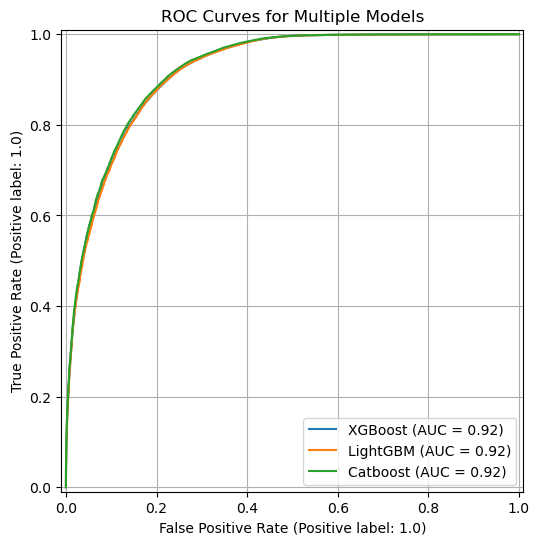

In [54]:
from sklearn.metrics import roc_curve, auc

fig, ax = plt.subplots(figsize=(8, 6))

xgb_disp = RocCurveDisplay.from_estimator(xgb, X_test, y_test, ax=ax, name="XGBoost")

lgbm_disp = RocCurveDisplay.from_estimator(lgbm, X_test, y_test, ax=ax, name="LightGBM")

cat_disp = RocCurveDisplay.from_estimator(cat, X_test, y_test, ax=ax, name="Catboost")

plt.title("ROC Curves for Multiple Models")
plt.grid(True)
plt.show()

In [39]:
ids = df_test['id']
df_test = df_test.drop('id', axis=1)

In [40]:
df_test.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
1,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
2,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
3,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
4,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1


In [41]:
df_test = encoding(df_test, 'gender')

df_test = encoding(df_test, 'marital_status')

df_test = encoding(df_test, 'education_level')

df_test = encoding(df_test, 'employment_status')

df_test = encoding(df_test, 'loan_purpose')

In [42]:
df_test = pd.concat([
    df_test.drop('grade_subgrade', axis=1),
    df_test['grade_subgrade'].apply(lambda x: [x[0], x[1]]).apply(pd.Series)
], axis=1)
df_test.columns = df_test.columns.astype(str)
df_train.columns = df_train.columns.astype(str)
df_train = df_train.rename({'0': 'grade', '1': 'subgrade'})
df_test = encoding(df_test, '0')
df_test['1'] = df_test['1'].astype(int)

In [43]:
model = RandomForestClassifier(**params)
model.fit(X, y)

RandomForestClassifier(criterion='log_loss', n_estimators=150)

In [44]:
pd.concat(
    [pd.DataFrame(ids, columns=['id']), 
     pd.DataFrame(model.predict(df_test), columns=['loan_paid_back'])]
     ,axis=1).set_index('id').to_csv('submission.csv')
     